In [1]:
from numpy import genfromtxt
from numpy import *
import matplotlib
import csv
from scipy import sparse
%pylab
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import cluster


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
description = genfromtxt('description.csv', delimiter=',')

In [3]:
social_evolution = genfromtxt('social_and_evolution.csv', delimiter=',')

In [4]:
m=1829
n=8000
X_dat=genfromtxt('description.csv',delimiter=',')
X_c=sparse.coo_matrix((m,n))
X_c.data=X_dat[:,2].astype(float64)
X_c.row=X_dat[:,0].astype(int32)
X_c.col=X_dat[:,1].astype(int32)
X=X_c.todense()

In [5]:
Y = X

In [6]:
def cca(XA,XB,d):
    XA_c=matrix(XA-average(XA,0))
    XB_c=matrix(XB-average(XB,0))
    sig11=transpose(XA_c)*XA_c
    sig12=transpose(XA_c)*XB_c
    sig22=transpose(XB_c)*XB_c
    sig21=transpose(XB_c)*XA_c
    lambdaA,wA=linalg.eigh(inv(sig11)*sig12*inv(sig22)*sig21)
    ind=argsort(lambdaA)[::-1]
    return XA_c*matrix(wA[:,ind[0:d]])

In [7]:
cca1 = cca(Y,social_evolution,2)

In [8]:
cca1[1][0]

matrix([[ 0.01271196, -0.0126663 ]])

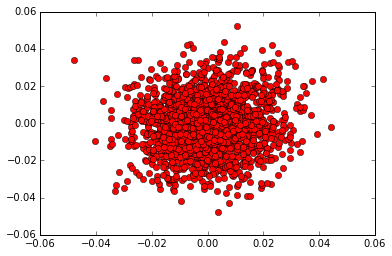

In [9]:
plt.plot(cca1[:,0], cca1[:,1], 'ro')
plt.show()

In [10]:
graph_pcad = numpy.genfromtxt("Y.csv")

#KMEANS CLUSTERING

In [11]:
from sklearn import cluster


In [12]:
k_means = cluster.KMeans(n_clusters=13)
Y = k_means.fit_transform(cca1)

In [13]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)

In [14]:
numpy.bincount(k_means.labels_)

array([252, 155,  77,  98, 128,  88, 135, 102, 226, 100, 179,  60, 229])

In [18]:
k_means.labels_

array([11,  4,  9,  2, 10,  1,  3,  2,  6, 10,  1, 10, 11,  2,  8,  5,  1,
        7,  2,  7,  1,  1,  0, 11,  0,  8,  6, 11,  7, 10,  2,  6,  1,  4,
       11,  7,  1,  4,  9, 10,  7,  5,  3,  4,  4, 11,  4,  2,  0,  1,  1,
        3, 11,  1,  9, 10, 12, 11,  4,  1,  7,  2,  1,  2, 11,  0, 11, 11,
       12,  0,  4,  9, 10,  6, 11,  7,  1,  1, 11,  7,  7,  0, 10,  5,  5,
        4,  4, 11, 12,  0,  4,  4,  4,  1,  0, 11, 12,  9,  0, 11,  1,  4,
        4,  8,  1,  8,  3, 10,  4,  1,  4,  7, 11,  0, 11,  4,  5,  4,  4,
        4,  7,  7,  7,  6,  3,  3,  4,  7, 11,  4,  6, 11,  5,  7,  5,  5,
        8,  4,  6,  8, 11,  1,  7,  9, 10,  7,  4, 11,  3,  1,  4,  6, 10,
        7,  3,  1,  4,  0,  7,  6,  1,  4, 12, 11,  2,  2, 10,  9,  2,  1,
        4,  7,  3, 10,  2, 10,  5,  6,  4,  5,  4, 10,  4,  0,  8,  0,  6,
        1, 10,  2,  5,  6, 11,  9,  4,  2,  2,  1,  4,  2,  8,  9,  7, 11,
       11, 11, 11, 11,  7, 11,  5,  2,  2,  1,  6, 11,  6,  7,  2,  2,  6,
        3,  4,  7,  7,  4

In [20]:
numpy.savetxt("task2.1.csv", k_means.labels_, fmt='%u', header="index,category", delimiter=",")

#MEAN SHIFT CLUSTERING

In [15]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [16]:
bandwidth = estimate_bandwidth(cca1, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(cca1)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


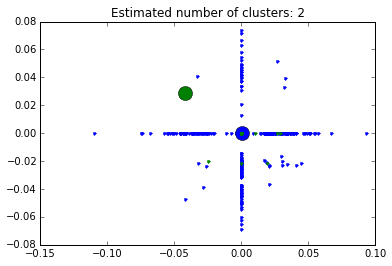

In [13]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [17]:
numpy.bincount(ms.labels_)

array([1784,   45])

#SPECTRAL CLUSTERING

In [14]:
from sklearn.cluster import spectral_clustering


In [18]:
model = spectral_clustering(cca1, n_clusters=13)

ValueError: array must be 2-dimensional and square. shape = (1829, 2)

#Single Link Clustering

In [ ]:
scipy.cluster.hierarchy.linkage



#Aglomerate Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering


In [12]:
linkage1 = 'ward'
clustering1 = AgglomerativeClustering(linkage=linkage1, n_clusters=13)
clustering1.fit(cca1)
numpy.bincount(clustering1.labels_)
#numpy.savetxt("task2.2.csv", clustering1.labels_, fmt='%u', header="index,category", delimiter=",")

array([292, 339, 254,  38,  55, 110, 162,  62, 130, 148,  33,  78, 128])

In [13]:
linkage2 = 'average'
clustering2 = AgglomerativeClustering(linkage=linkage2, n_clusters=13)
clustering2.fit(cca1)
numpy.bincount(clustering2.labels_)
#numpy.savetxt("task2.3.csv", clustering2.labels_, fmt='%u', header="index,category", delimiter=",")

array([ 94, 232,   2,  12, 424, 600,   2,   1,   1, 179, 267,  10,   5])

In [14]:
linkage3 = 'complete'
clustering3 = AgglomerativeClustering(linkage=linkage3, n_clusters=13)
clustering3.fit(cca1)
numpy.bincount(clustering3.labels_)
#numpy.savetxt("task2.4.csv", clustering3.labels_, fmt='%u', header="index,category", delimiter=",")

array([238,  35,  93,  70, 301,  74, 230,  24, 480,  11,  21,  17, 235])